In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = open("data_description.txt", "r")
print(file.read())


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
#load dataset
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.sample(n=10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1076,1077,50,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,4,2006,WD,Normal,170000
889,890,20,RL,128.0,12160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,149500
543,544,120,RH,34.0,4058,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,133000
1376,1377,30,RL,52.0,6292,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,91000
818,819,80,RL,80.0,8816,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,155000
752,753,20,RL,79.0,9236,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,217000
920,921,60,RL,70.0,8462,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,201000
419,420,20,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2010,WD,Normal,142000
693,694,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,108480
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [5]:
test.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
1185,2646,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
1036,2497,50,RL,70.0,10512,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
338,1799,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal
791,2252,20,RL,85.0,10667,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
814,2275,20,RL,128.0,13001,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2007,WD,Normal
213,1674,20,RL,70.0,9658,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
960,2421,20,RL,75.0,9532,Pave,NaN,Reg,Lvl,AllPub,...,0,368,NaN,GdPrv,NaN,0,2,2007,WD,Normal
1068,2529,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2007,WD,Normal
1239,2700,120,RL,50.0,7175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal


In [57]:
print(train.shape)
print(test.shape)
sum(train.isnull().any())#19 columns have missing vlaues
sum(test.isnull().any()) #33 columns have missing values

(1460, 81)
(1459, 80)


33

In [9]:
colnames=train.columns.tolist()
colnames

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [40]:
x_vars=colnames[:-1]
y_vars=colnames[-1]

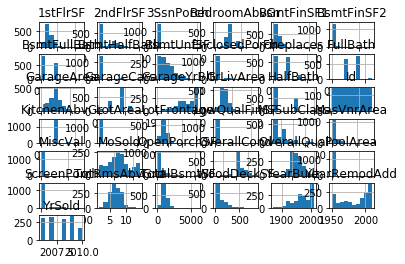

<Figure size 1008x2376 with 0 Axes>

In [41]:
train[x_vars].hist()
plt.figure(figsize=(14, 33))
plt.show()

In [42]:
type(x_vars)

list

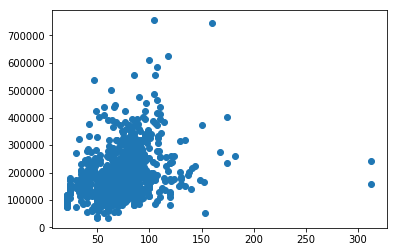

In [43]:
plt.scatter(x=train["LotFrontage"],y=train[y_vars])

In [44]:
type(train["LotFrontage"][2])

numpy.float64

### group by datatypes

In [45]:
group= train.columns.to_series().groupby(train.dtypes).groups
group

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 

In [47]:
x_continuous=[ 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']
#'MSSubClass' should be categorical

In [48]:
x_categorical=['MSSubClass' ,'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
        'SaleType', 'SaleCondition']

In [49]:
train[x_continuous].shape

(1460, 35)

In [50]:
x_continuous[1]

'OverallQual'

In [51]:
train[x_categorical]

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,50,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,60,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,50,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,190,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


### Plot continuous variable

IndexError: list index out of range

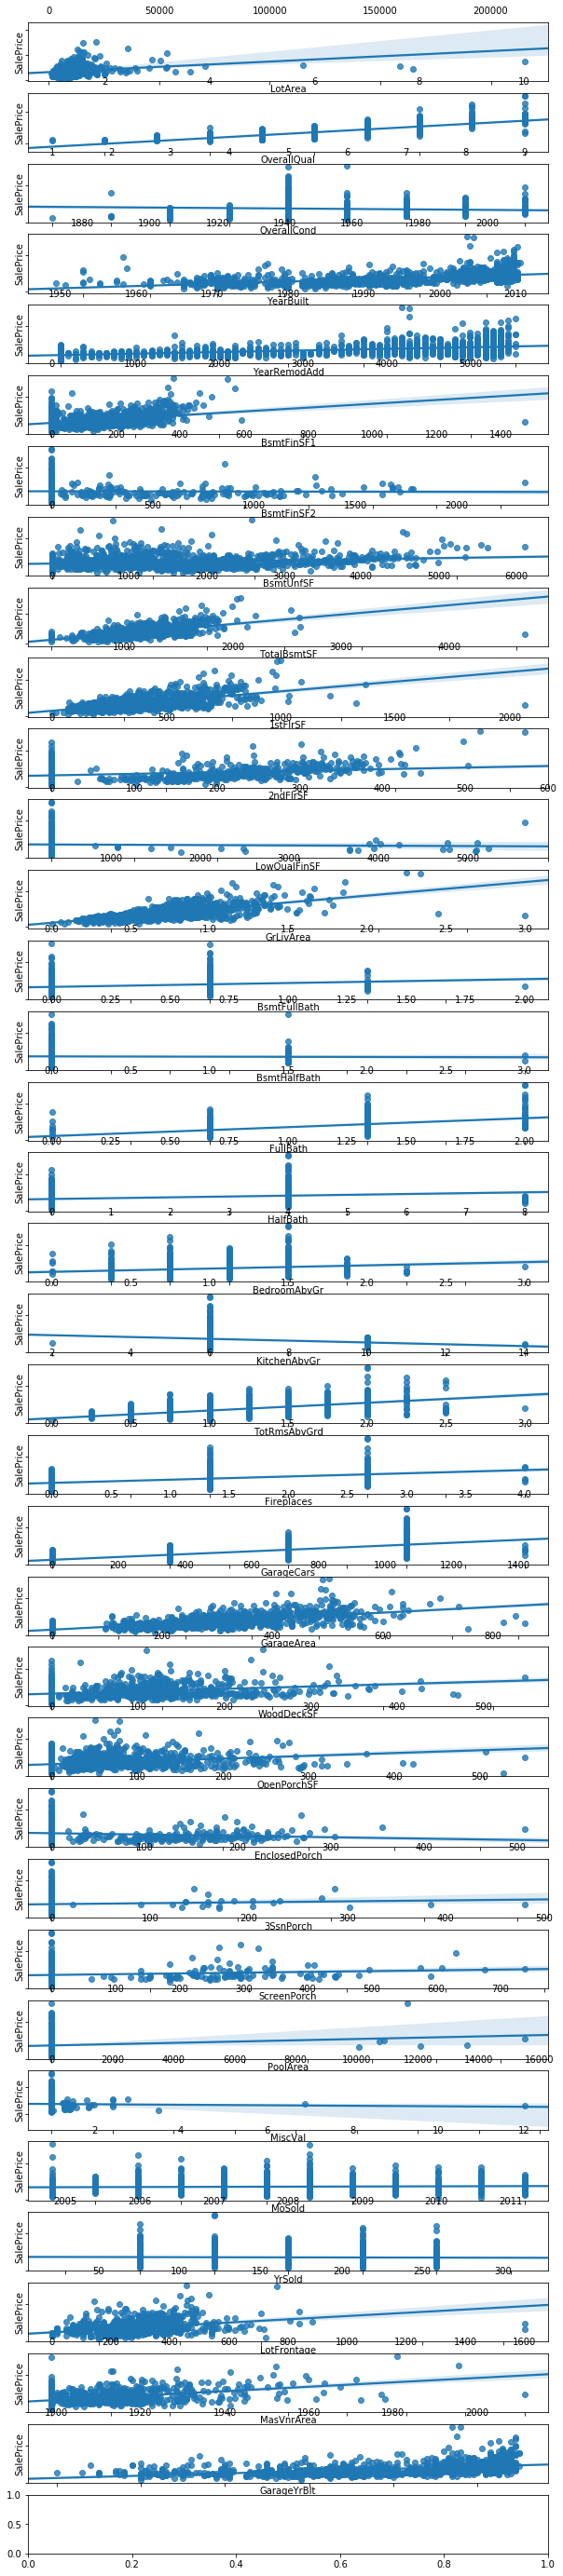

In [52]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

gs=gridspec.GridSpec(36,1)
plt.figure(figsize=(10, 50))
for i in range(36):
    ax1 = plt.subplot(gs[i, 0])
    ax1.set_title('')
    ax1.set_ylabel("")
    ax1.set_xlabel("")
    xlim=ax1.get_xlim()
   # ax2 = plt.subplot(gs[i, 1])    
    sns.regplot(y=train[y_vars],x=train[x_continuous[i]], ax=ax1)
    for tick in ax1.xaxis.get_major_ticks():
        tick.label1On = False
        tick.label2On = True
    for tick in ax1.yaxis.get_major_ticks():
        tick.label1On=False

    
plt.show()


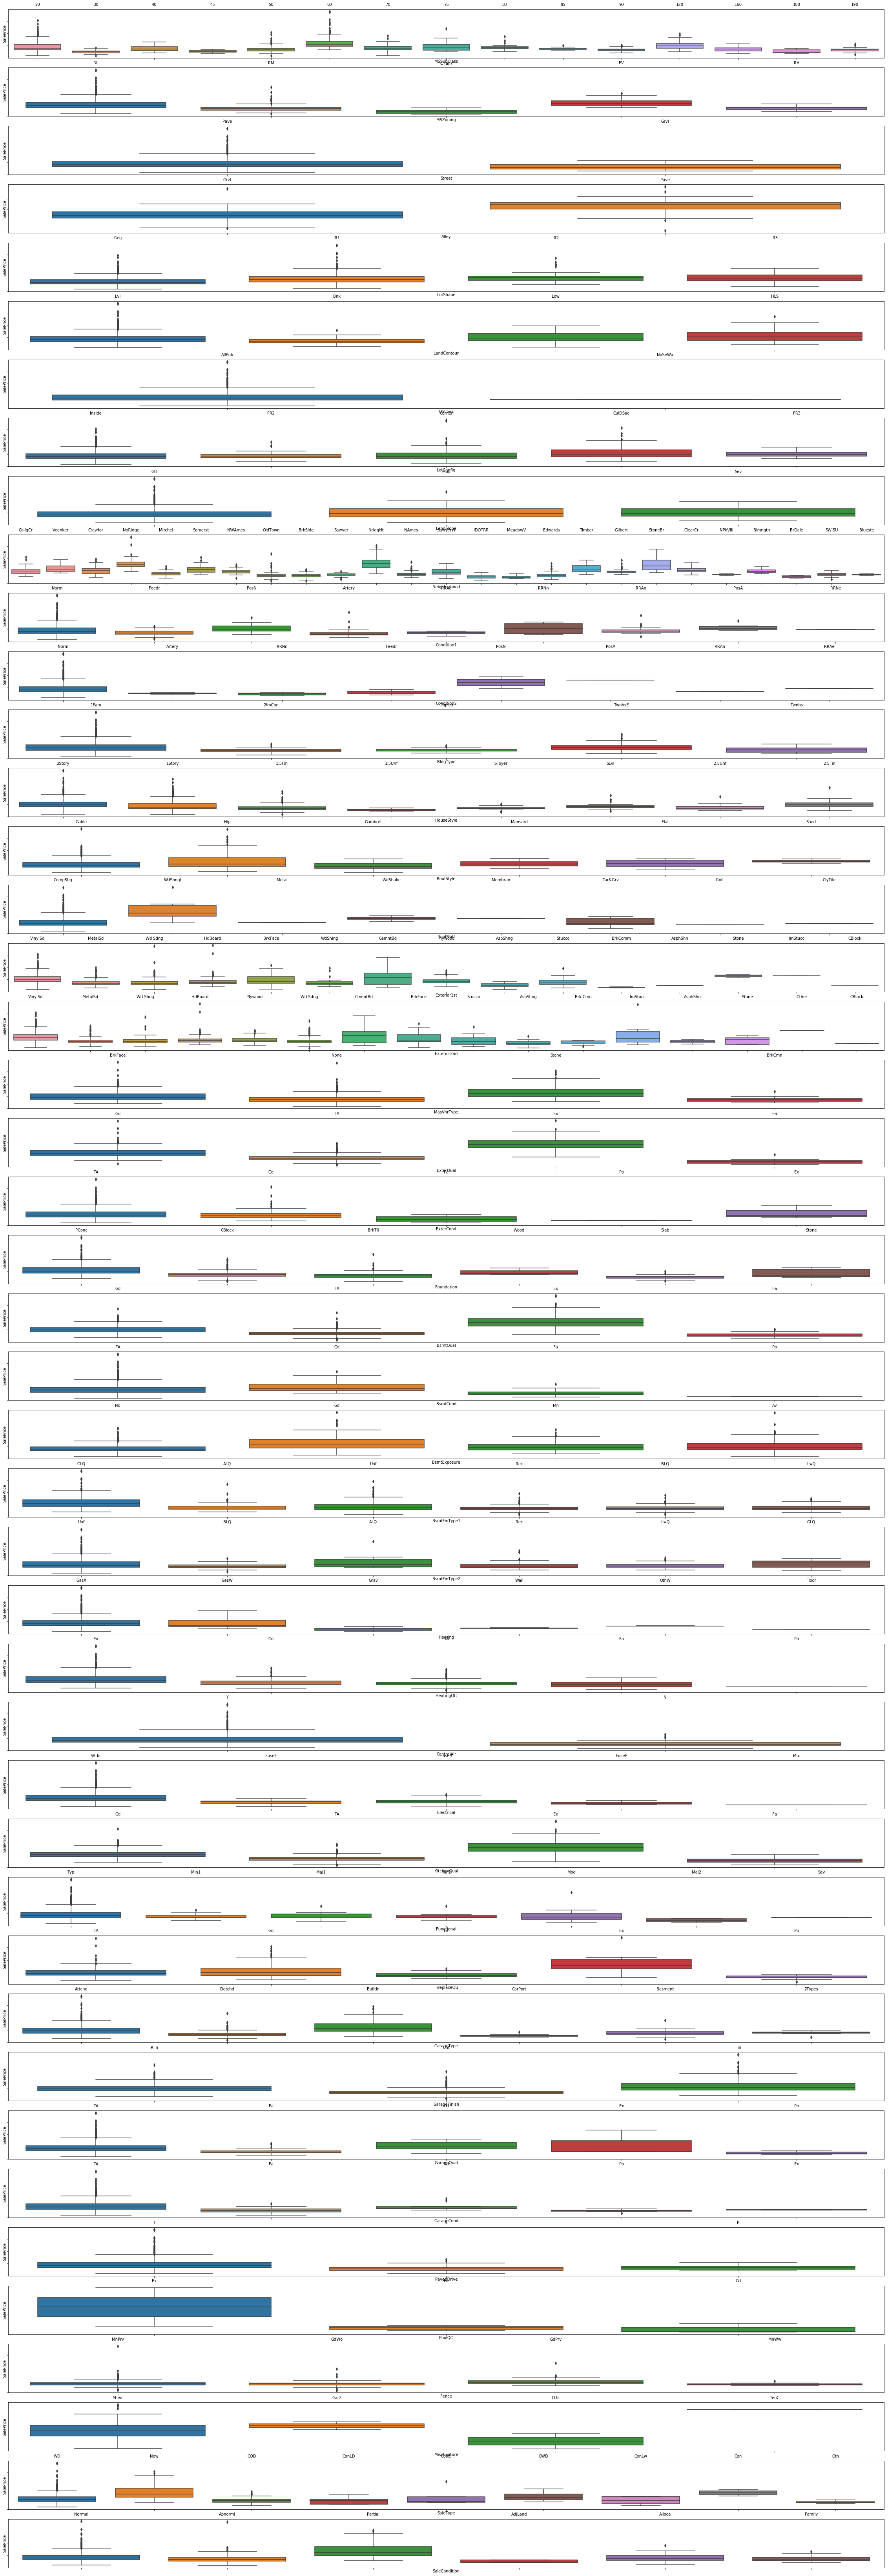

In [53]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

gs=gridspec.GridSpec(44,1)
plt.figure(figsize=(40, 120))
for i in range(44):
    ax1 = plt.subplot(gs[i, 0])
    ax1.set_title('')
    ax1.set_ylabel("")
    ax1.set_xlabel("")
    xlim=ax1.get_xlim()
    sns.boxplot(y=train[y_vars],x=train[x_categorical[i]], ax=ax1)
    for tick in ax1.xaxis.get_major_ticks():
        tick.label1On = False
        tick.label2On = True
    for tick in ax1.yaxis.get_major_ticks():
        tick.label1On=False

    
plt.show()


### Variables that need to be dummified and combined

 Need to encode some fields based on their definition and drop the original.
 
 Exterior1st, Exterior2nd (Exterior covering on house)


BsmtFinType1, BsmtFinType2, BsmtFinSF1 (Type 1 finished square feet), BsmtFinSF2 (Type 1 finished square feet)
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area


BsmtFullBath, BsmtHalfBath  (number of type of bathroom in the basement)


OpenPorchSF ( Open porch area in square feet)
EnclosedPorch (Enclosed porch area in square feet)
3SsnPorch (Three season porch area in square feet)
ScreenPorch (Screen porch area in square feet)


MasVnrType, MasVnrArea


PoolQC, PoolArea

In [58]:
train[["Exterior1st","Exterior2nd"]]

,Exterior1st,Exterior2nd
0,VinylSd,VinylSd
1,MetalSd,MetalSd
2,VinylSd,VinylSd
3,Wd Sdng,Wd Shng
4,VinylSd,VinylSd
5,VinylSd,VinylSd
6,VinylSd,VinylSd
7,HdBoard,HdBoard
8,BrkFace,Wd Shng
9,MetalSd,MetalSd


In [69]:
#houses with different exterior: one-hot encoding
train[train["Exterior1st"]!=train["Exterior2nd"]][["Exterior1st","Exterior2nd"]]

In [ ]:
train=pd.get_dummies(train[["Exterior1st","Exterior2nd"]],drop_first=True,dummy_na=True) #dummify both the exterior column
train.columns=train.columns.str.replace("1st","") #change name of the column
train.columns=train.columns.str.replace("2nd","")
train=train.groupby(part.columns, axis=1).sum() #count the exterior column
train=train.astype(float)
train[train.groupby(train.columns, axis=1).sum()>1]=train[train.groupby(train.columns, axis=1).sum()>1]-1# list comprehension?
train

BsmtFinType1, BsmtFinType2, BsmtFinSF1 (Type 1 finished square feet), BsmtFinSF2 (Type 1 finished square feet) BsmtUnfSF: Unfinished square feet of basement area TotalBsmtSF: Total square feet of basement area

In [60]:
basement_set=train[["BsmtFinType1", "BsmtFinType2","BsmtFinSF1" , "BsmtFinSF2" ,"BsmtUnfSF","TotalBsmtSF",y_vars]]
basement_set["finishedportion"]=1-(basement_set["BsmtUnfSF"]/basement_set["TotalBsmtSF"])
basement_set["finishedportion"].isna().sum()

C:\Users\samuelmao\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


37

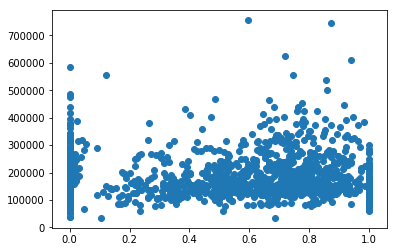

In [61]:
plt.scatter(x=basement_set["finishedportion"],y=basement_set[y_vars])

In [310]:
sum(basement_set["TotalBsmtSF"]==0)

37